In [1]:
from copulas.multivariate import GaussianMultivariate
from copulas.visualization import compare_2d
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

In [2]:
integrated_data = pd.read_csv("../data/processed/five_node_model_integrated_data.csv")
numerical_column_df = integrated_data[["Unweighted_Temp","ln_GDP_Change","ln_TFP_Change","ln_Life_Expectancy_change"]]
numerical_column_df.dropna(inplace=True)
copula = GaussianMultivariate()
copula.fit(numerical_column_df)

/var/folders/q3/myxq41dd4_9c_rx76zlk8f3r0000gn/T/ipykernel_23032/3860752996.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical_column_df.dropna(inplace=True)
/Users/hayden.freedman/miniconda3/envs/env_data_modeling/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:709: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/Users/hayden.freedman/miniconda3/envs/env_data_modeling/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:5574: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)
/Users/hayden.freedman/miniconda3/envs/env_data_modeling/lib/python3.9/site-packages/scipy/stats/_distn_infrastructure.py:2789: RuntimeWarning: invalid value encountered in double_scalars
  Lhat

In [3]:
samples = copula.sample(len(numerical_column_df))

In [4]:
print(samples.head())

   Unweighted_Temp  ln_GDP_Change  ln_TFP_Change  ln_Life_Expectancy_change
0        25.349576       0.086305       0.100061                   0.002997
1        24.221768       0.062591       0.065346                  -0.003513
2        13.630075       0.120632       0.085201                   0.013666
3        11.238319       0.044877       0.005411                  -0.000383
4         7.798332       0.025280       0.003130                  -0.004229


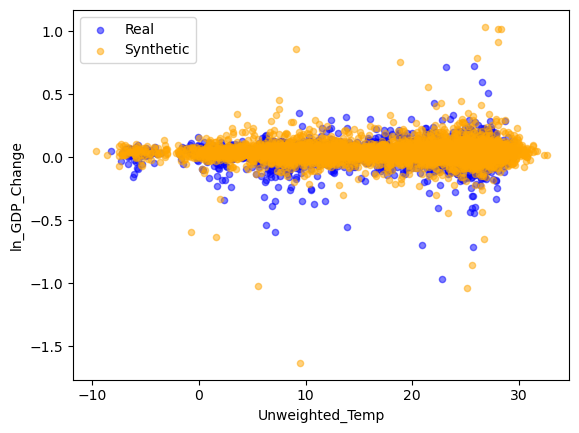

In [5]:
compare_2d(numerical_column_df[["Unweighted_Temp","ln_GDP_Change"]], samples[["Unweighted_Temp","ln_GDP_Change"]])

In [7]:
mean = np.mean(integrated_data["Unweighted_Temp"])
real_low_temp_samples = integrated_data.loc[(integrated_data["Unweighted_Temp"] < mean)]["ln_GDP_Change"]
real_high_temp_samples = integrated_data.loc[(integrated_data["Unweighted_Temp"] > mean)]["ln_GDP_Change"]
print(np.mean(real_low_temp_samples))
print(np.mean(real_high_temp_samples))

0.03294778562469904
0.03884081076660345


In [8]:
mean = np.mean(integrated_data["Unweighted_Temp"])
sample_low_temp_samples = samples.loc[(samples["Unweighted_Temp"] < mean)]["ln_GDP_Change"]
sample_high_temp_samples = samples.loc[(samples["Unweighted_Temp"] > mean)]["ln_GDP_Change"]
print(np.mean(sample_low_temp_samples))
print(np.mean(sample_high_temp_samples))

0.03897239110605738
0.04406892683841222


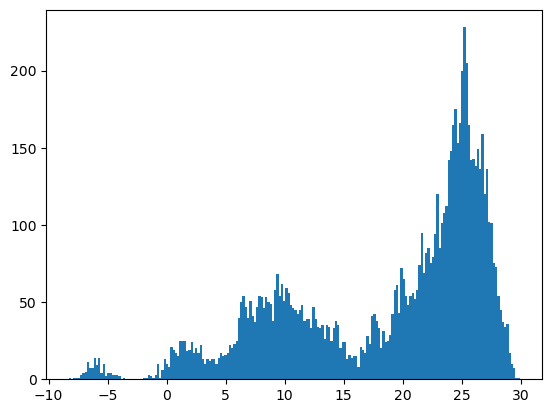

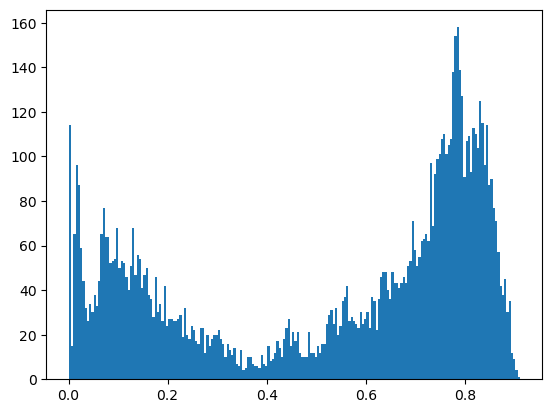

In [53]:
plt.hist(integrated_data["Unweighted_Temp"],bins=200)
plt.show()
plt.hist(
    norm.cdf(
        integrated_data["Unweighted_Temp"], 
        np.mean(integrated_data["Unweighted_Temp"]), 
        np.std(integrated_data["Unweighted_Temp"])
),bins=200)
plt.show()